In [36]:
from sklearn.datasets import make_classification
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd

1.

In [37]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['type'] = iris.target
columns_name = [ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name = [col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols
print(df.head())

   SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  Type
0             5.1            3.5             1.4            0.2     0
1             4.9            3.0             1.4            0.2     0
2             4.7            3.2             1.3            0.2     0
3             4.6            3.1             1.5            0.2     0
4             5.0            3.6             1.4            0.2     0


3.

In [38]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

X_train = train_set.drop("Type", axis=1)
y_train = train_set["Type"].copy()
X_test = train_set.drop("Type", axis=1)
y_test = train_set["Type"].copy()

print(len(train_set))
print(len(test_set))

120
30


4.

In [39]:
clf = DecisionTreeClassifier(max_depth=100)
clf.fit(X_train, y_train)

print(f"{clf.score(X_test, y_test)} ")
print(f"{clf.score(X_train, y_train)}" )

1.0 
1.0


5.

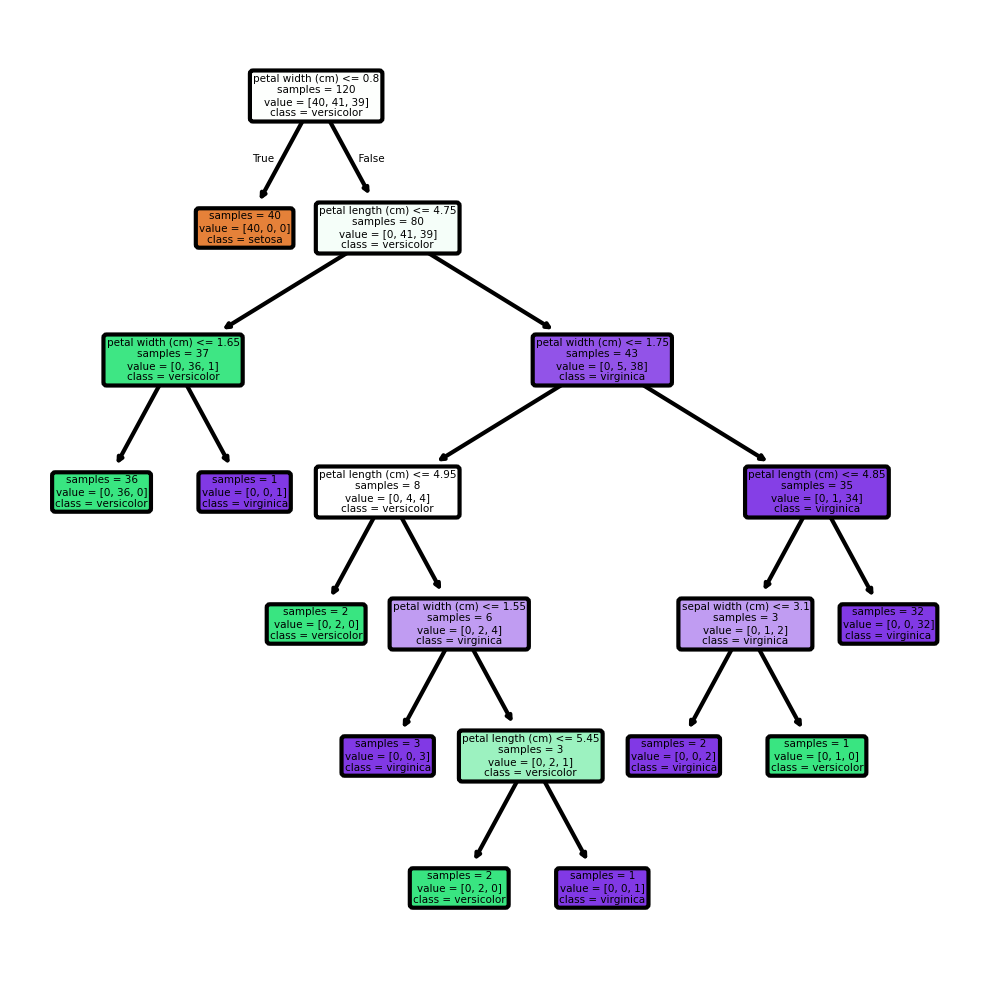

In [40]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph = tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

Esta gráfica muestra una visualización del algoritmo; un arbol de profundidad siete con cada caja (nodo) mostrando las condiciones usadas para clasificar (en la mayoria de veces que se corrió el código, se usaban las caracteristica de petal length y petal width). La especie setosa se logró clasificar casi inmediatamente.

6.

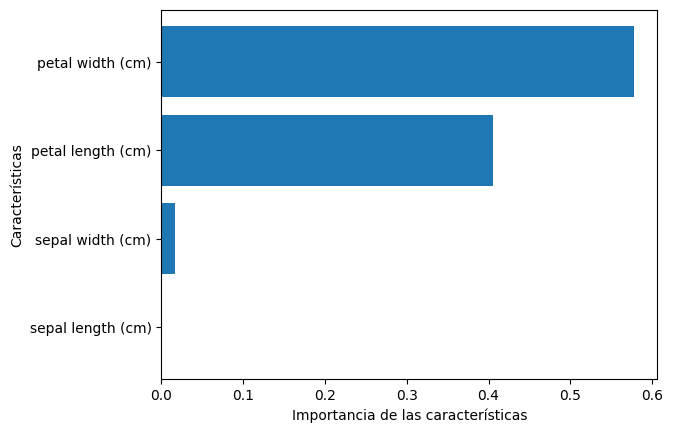

In [41]:
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()


Como indica el gráfico, la caractersticas de petal length y petal width suelen tener la mayor importancia en la clasificación.

7.

/tmp/ipython-input-4050335805.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-4050335805.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-4050335805.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-4050335805.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/tmp/ipython-input-4050335805.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],


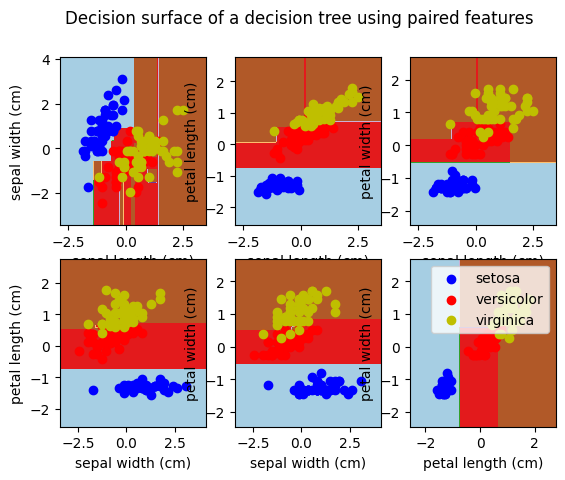

In [42]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    clf = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

La gráfica muestra las fronteras de decisión tomando cada par entre las tres caracteristicas. La especie setosa es la más facil de aislar.